In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [46]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

There are 33 columns with 7043 data.

Only churn reason has null values in this dataset.

In [47]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Target variable (Churn value) is binary.

In [48]:
leakage_cols = [
    "Churn Label",
    "Churn Score",
    "Churn Reason",
    "CLTV",
    "Count"
]

df.drop(columns=leakage_cols, inplace=True)

Removed post-churn and leakage variables to avoid inflating model performance.

In [49]:
location_cols = [
    "CustomerID",
    "Country",
    "State",
    "City",
    "Zip Code",
    "Lat Long",
    "Latitude",
    "Longitude"
]

df.drop(columns=location_cols, inplace=True)

In [50]:
df.rename(columns={"Churn Value": "Churn"}, inplace=True)

In [51]:
df["Senior Citizen"].value_counts()

,count
Senior Citizen,
No,5901
Yes,1142


In [52]:
df["Senior Citizen"] = df["Senior Citizen"].map({"Yes": 1, "No": 0})

In [53]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [54]:
df.isnull().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


In [55]:
df.dropna(inplace=True)

In [56]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [57]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   partner            7032 non-null   object 
 3   dependents         7032 non-null   object 
 4   tenure_months      7032 non-null   int64  
 5   phone_service      7032 non-null   object 
 6   multiple_lines     7032 non-null   object 
 7   internet_service   7032 non-null   object 
 8   online_security    7032 non-null   object 
 9   online_backup      7032 non-null   object 
 10  device_protection  7032 non-null   object 
 11  tech_support       7032 non-null   object 
 12  streaming_tv       7032 non-null   object 
 13  streaming_movies   7032 non-null   object 
 14  contract           7032 non-null   object 
 15  paperless_billing  7032 non-null   object 
 16  payment_method     7032 non-n

,senior_citizen,tenure_months,monthly_charges,total_charges,churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [58]:
df.to_csv("Cleaned_Telco_Churn.csv", index=False)

#EXPLORATORY DATA ANALYSIS (EDA)

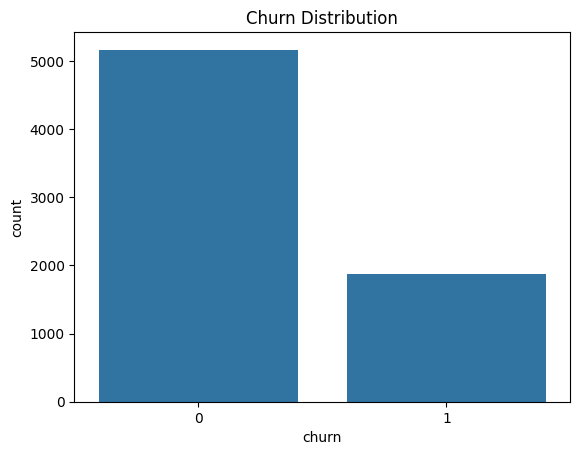

In [59]:
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

The dataset shows moderate class imbalance, with churned customers forming a minority. This will be considered during model evaluation. Round 25-30% churns.

##NUMERICAL FEATURES VS CHURN

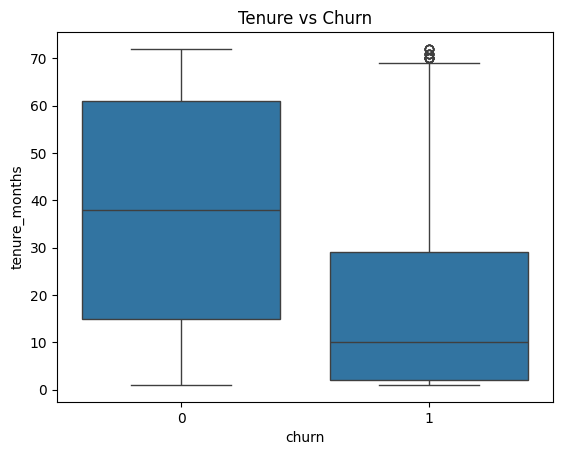

In [60]:
sns.boxplot(x="churn", y="tenure_months", data=df)
plt.title("Tenure vs Churn")
plt.show()

Customers with shorter tenure are significantly more likely to churn, indicating early customer experience is critical.

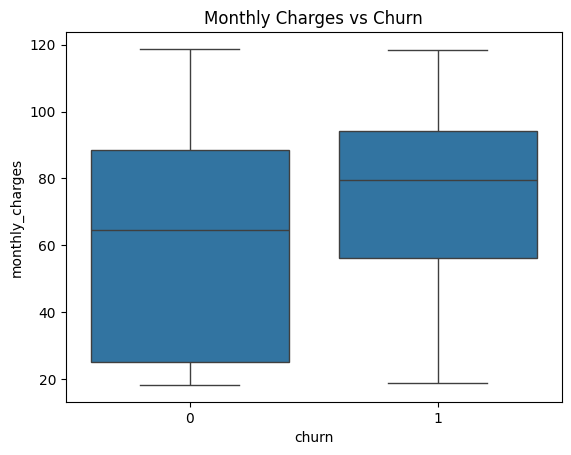

In [61]:
sns.boxplot(x="churn", y="monthly_charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Customers paying higher monthly charges exhibit higher churn, suggesting pricing sensitivity.

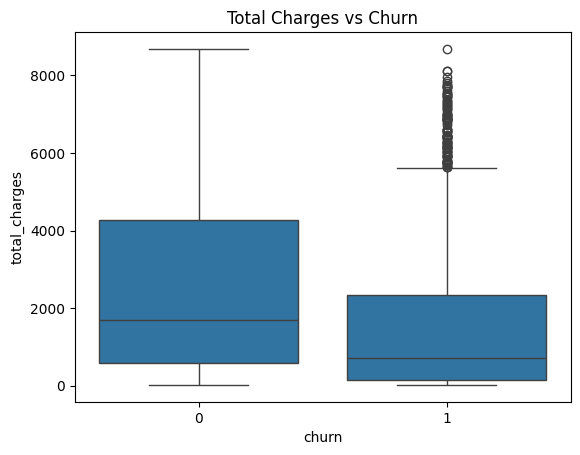

In [62]:
sns.boxplot(x="churn", y="total_charges", data=df)
plt.title("Total Charges vs Churn")
plt.show()

Lower total charges for churned customers.

##CATEGORICAL FEATURES VS CHURN

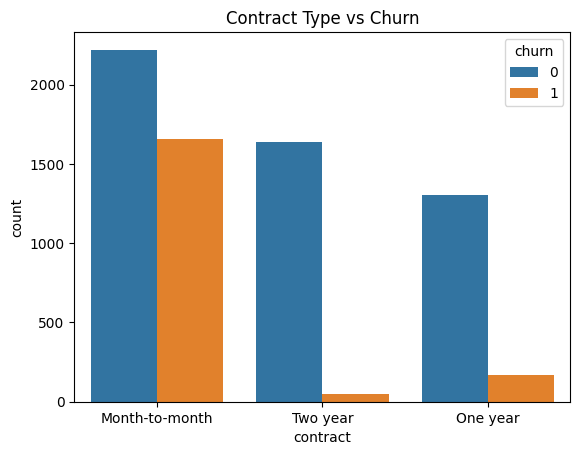

In [63]:
sns.countplot(x="contract", hue="churn", data=df)
plt.title("Contract Type vs Churn")
plt.show()

Month-to-month customers churn most

Long-term contracts retain customers

**Encouraging long-term contracts can significantly reduce churn.**

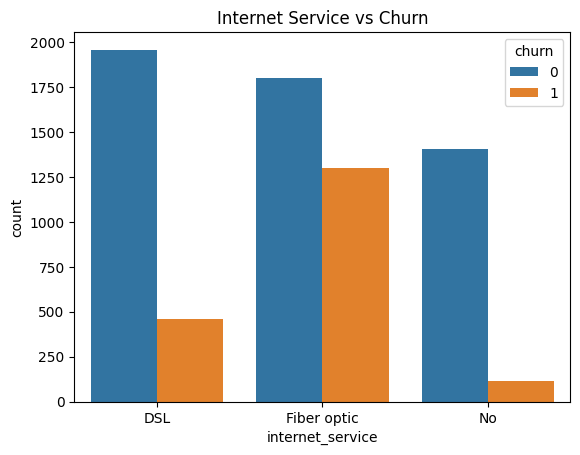

In [64]:
sns.countplot(x="internet_service", hue="churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()

Fiber optic customers churn more

Possible quality or pricing issue

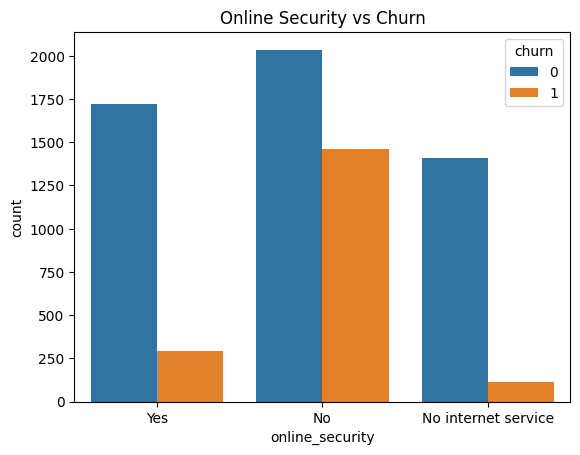

In [65]:
sns.countplot(x="online_security", hue="churn", data=df)
plt.title("Online Security vs Churn")
plt.show()

Customers without online security churn more


**Value-added services reduce churn risk.**

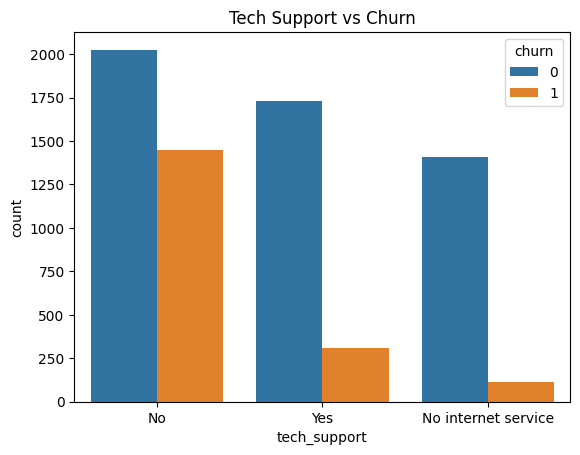

In [66]:
sns.countplot(x="tech_support", hue="churn", data=df)
plt.title("Tech Support vs Churn")
plt.show()

Tech support availability lowers churn

##BILLING & PAYMENT BEHAVIOR

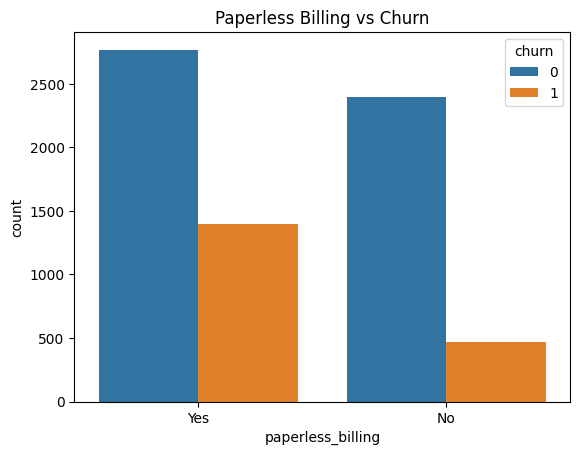

In [67]:
sns.countplot(x="paperless_billing", hue="churn", data=df)
plt.title("Paperless Billing vs Churn")
plt.show()

Paperless billing users churn slightly more

Possibly digital-first customers are price sensitive

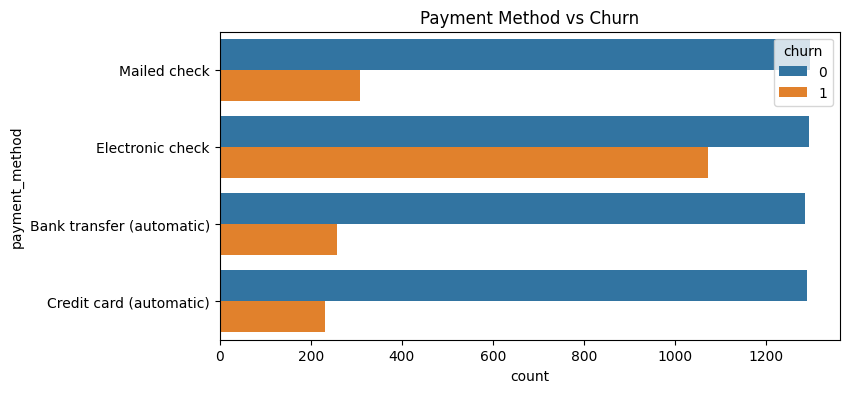

In [68]:
plt.figure(figsize=(8,4))
sns.countplot(y="payment_method", hue="churn", data=df)
plt.title("Payment Method vs Churn")
plt.show()

Electronic check users churn more

Auto-pay methods retain customers

## DEMOGRAPHIC FEATURES

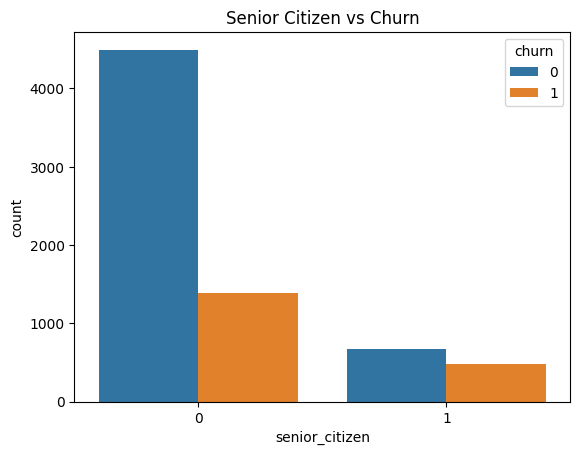

In [69]:
sns.countplot(x="senior_citizen", hue="churn", data=df)
plt.title("Senior Citizen vs Churn")
plt.show()

Senior citizens churn slightly more

Special retention programs may help

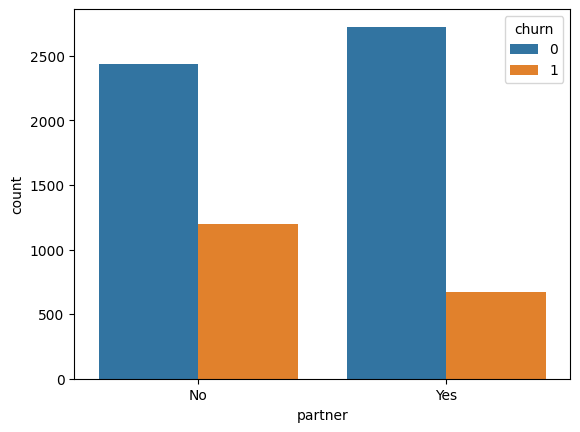

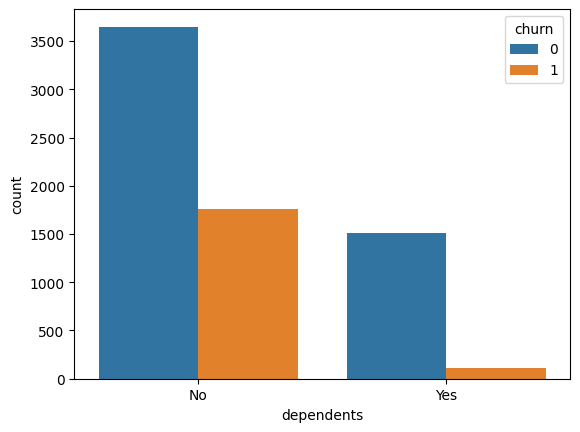

In [70]:
sns.countplot(x="partner", hue="churn", data=df)
plt.show()

sns.countplot(x="dependents", hue="churn", data=df)
plt.show()

Customers with partners/dependents churn less

Family ties increase retention

## CORRELATION ANALYSIS

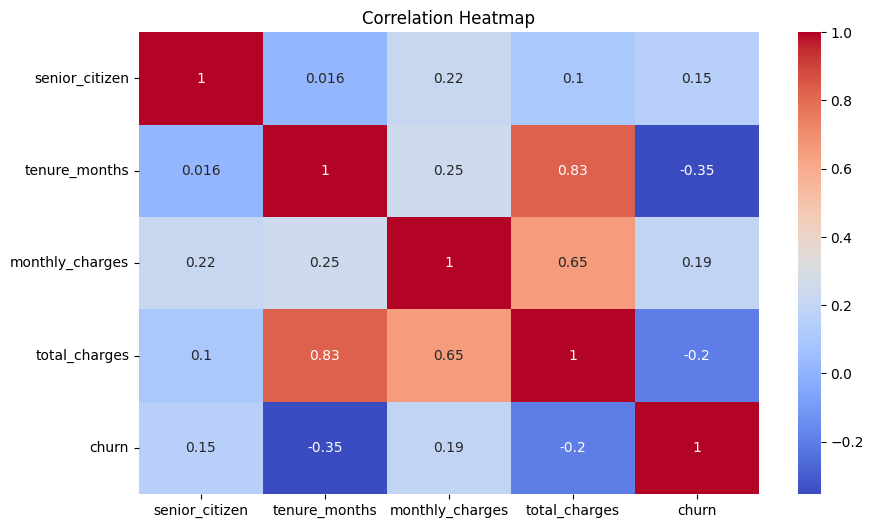

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Analysis - Key Insights

The correlation heatmap provides insights into the linear relationships between numerical features and customer churn.

- **Tenure Months vs Churn (-0.35):**
  Tenure shows the strongest correlation with churn among numerical variables.
  The negative correlation indicates that customers with longer tenure are significantly less likely to churn.
  This suggests that customer loyalty increases over time and early customer experience is critical.

- **Monthly Charges vs Churn (0.19):**
  Monthly charges have a positive correlation with churn, indicating that customers paying higher monthly fees are more likely to churn.
  This highlights pricing sensitivity as an important churn driver.

- **Total Charges vs Churn (-0.20):**
  Total charges show a negative correlation with churn.
  Customers who have paid more over time (typically long-tenure customers) are less likely to churn, reinforcing the importance of retention.

- **Tenure Months vs Total Charges (0.83):**
  A strong positive correlation exists between tenure and total charges.
  This is expected, as customers who stay longer naturally accumulate higher total charges.
  Due to this strong correlation, potential multicollinearity should be considered during modeling.

- **Monthly Charges vs Total Charges (0.65):**
  Monthly charges are moderately correlated with total charges, indicating that both pricing level and duration contribute to overall customer value.

- **Senior Citizen vs Churn (0.15):**
  Senior citizen status shows a weak positive correlation with churn.
  While the effect is small, it suggests senior customers may require targeted retention strategies.

Overall, tenure and pricing-related variables emerge as the most influential numerical factors associated with customer churn.
These insights will guide feature selection and modeling decisions in subsequent steps.


#FEATURE ENGINEERING

In [72]:
x = df.drop("churn", axis=1)
y = df["churn"]

Explicitly separated predictors and target to avoid leakage.

In [73]:
num_features = x.select_dtypes(include=["int64", "float64"]).columns
num_features

Index(['senior_citizen', 'tenure_months', 'monthly_charges', 'total_charges'], dtype='object')

In [74]:
cat_features = x.select_dtypes(include=["object"]).columns
cat_features

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

Categorical variables are converted into numerical format using One-Hot Encoding.
The first category is dropped to avoid multicollinearity.

In [75]:
x_encoded = pd.get_dummies(
    x,
    columns=cat_features,
    drop_first=True
)

The dataset is split into training and testing sets.
Stratification is used to preserve the churn distribution.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Numerical features are scaled using StandardScaler.
The scaler is fitted only on training data to prevent data leakage.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

#MODELING

Logistic Regression is used as a baseline due to its interpretability
and effectiveness for binary classification problems.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

In [79]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Accuracy: 0.8045486851457001
Precision: 0.6410256410256411
Recall: 0.6016042780748663
F1 Score: 0.6206896551724138
ROC-AUC: 0.8431713352418323


Random Forest is used to capture non-linear relationships
and feature interactions.

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Accuracy: 0.7889125799573561
Precision: 0.6296296296296297
Recall: 0.5
F1 Score: 0.5573770491803278
ROC-AUC: 0.8288977123895409


Logistic Regression provides interpretability and serves as a strong baseline.
Random Forest improves performance by capturing complex feature interactions.

The better-performing model can be selected based on ROC-AUC and Recall,
which are critical for churn prediction.